## Review - 911 Calls data

In [1]:
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Cleaning & EDA

In [4]:
df['title'].value_counts().head(10)          #Counter(df['title']).most_common()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [5]:
df['category'] = df['title'].apply(lambda x: x.split(':')[0])

In [6]:
df['category'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: category, dtype: int64

In [7]:
df['twp'].value_counts().head(5)  # Counter(df['zip']).most_common(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
type(df['timeStamp'][1])

str

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df.loc[1,'timeStamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df['timeHour'] = df['timeStamp'].apply(lambda x: x.hour)
df['timeMonth'] = df['timeStamp'].apply(lambda x: x.month)
df['timeWk'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [11]:
daysofweek = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['timeWk'] = df['timeWk'].map(daysofweek)

In [12]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category,timeHour,timeMonth,timeWk,date
34827,40.299914,-75.370272,HARLEYSVILLE PIKE & KELLER CREAMERY RD; FRANC...,18969.0,EMS: GENERAL WEAKNESS,2016-03-07 07:27:01,FRANCONIA,HARLEYSVILLE PIKE & KELLER CREAMERY RD,1,EMS,7,3,Mon,2016-03-07
98359,40.230934,-75.522125,RT422 & LIMERICK CENTER RD UNDERPASS; LIMERI...,19468.0,EMS: VEHICLE ACCIDENT,2016-08-21 15:26:00,LIMERICK,RT422 & LIMERICK CENTER RD UNDERPASS,1,EMS,15,8,Sun,2016-08-21


## Plotting

Text(0.5, 0, 'Reason')

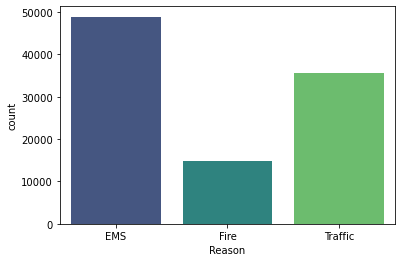

In [13]:
chart = sns.countplot(x=df['category'], palette='viridis')
chart.set_xlabel('Reason')

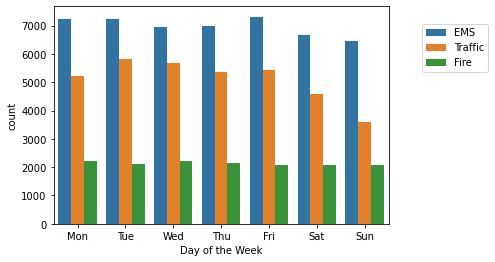

In [15]:
chart = sns.countplot(data=df, x='timeWk', hue='category', hue_order=['EMS', 'Traffic', 'Fire'], 
                      order='Mon Tue Wed Thu Fri Sat Sun'.split())
chart.set_xlabel('Day of the Week')
chart.legend(loc=(1.1,0.7))

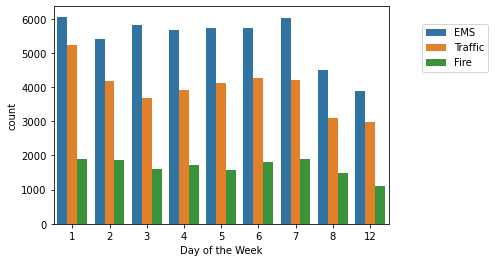

In [16]:
chart = sns.countplot(data=df, x='timeMonth', hue='category', hue_order=['EMS', 'Traffic', 'Fire'])
chart.set_xlabel('Day of the Week')
chart.legend(loc=(1.1,0.7))

# What about months 9-11?

In [17]:
df_bymonth = df.groupby(by='timeMonth')
df_bymonth = df_bymonth.count()
df_bymonth.reset_index(inplace=True)
df_bymonth

,timeMonth,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category,timeHour,timeWk,date
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='timeMonth', ylabel='count'>

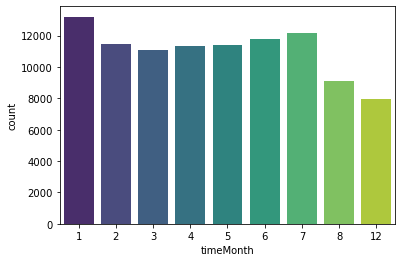

In [20]:
sns.countplot(data = df, x='timeMonth', palette='viridis')

<AxesSubplot:>

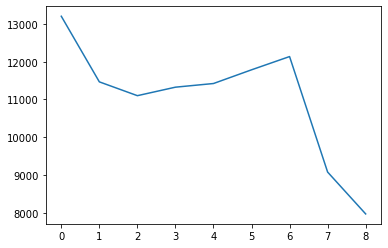

In [19]:
df_bymonth['lat'].plot.line()

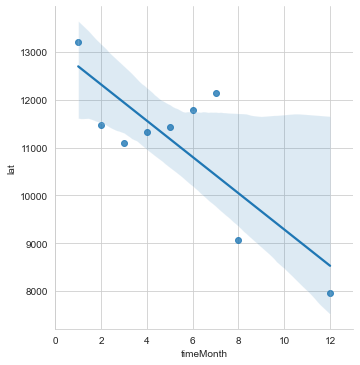

In [26]:
sns.set_style('whitegrid')
sns.lmplot(data=df_bymonth, x='timeMonth', y='lat').set(xlim=(0,13))

<AxesSubplot:xlabel='date'>

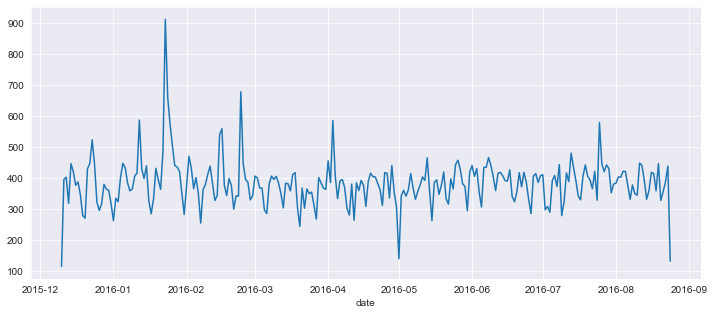

In [29]:
sns.set_style('darkgrid')
df.groupby(by='date').count()['lat'].plot.line(figsize=(12,5))

<AxesSubplot:xlabel='date'>

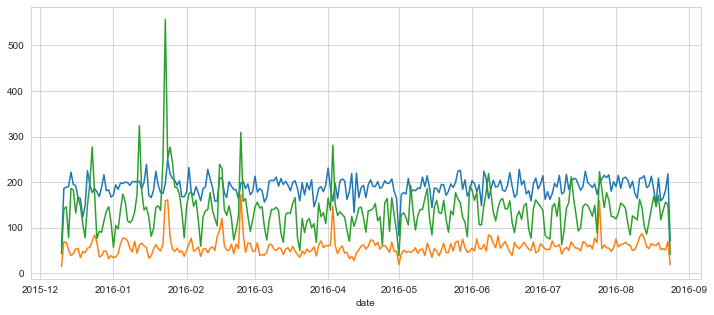

In [39]:
sns.set_style('whitegrid')
df.groupby(by=['category', 'date']).count()['lat'].loc['EMS'].plot.line(figsize=(12,5), label='EMS')
df.groupby(by=['category', 'date']).count()['lat'].loc['Fire'].plot.line(label='Fire')
df.groupby(by=['category', 'date']).count()['lat'].loc['Traffic'].plot.line(label='Traffic')

In [40]:
df.groupby(['timeWk','timeHour']).count()['lat'].unstack()

timeHour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
timeWk,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='timeHour', ylabel='timeWk'>

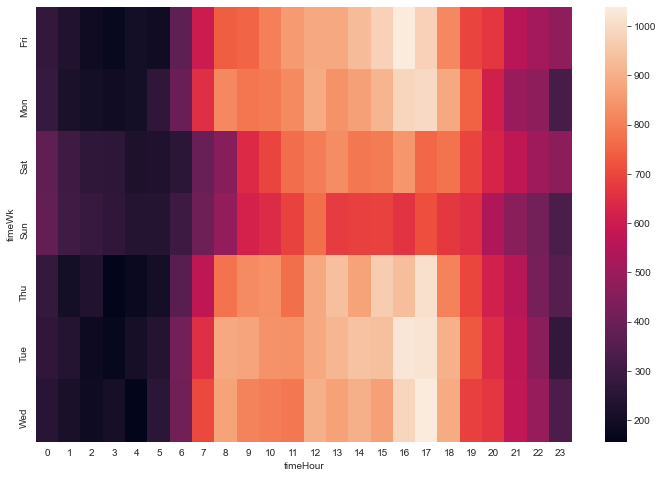

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(
            data=df.groupby(['timeWk', 'timeHour']).count()['lat'].unstack())

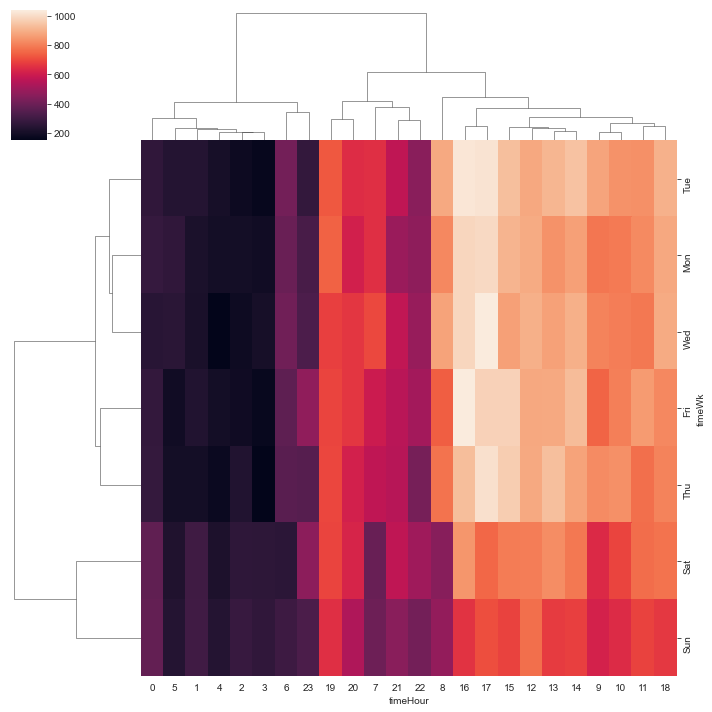

In [33]:
sns.clustermap(
            data=df.groupby(['timeWk', 'timeHour']).count()['lat'].unstack())

<AxesSubplot:xlabel='timeMonth', ylabel='timeWk'>

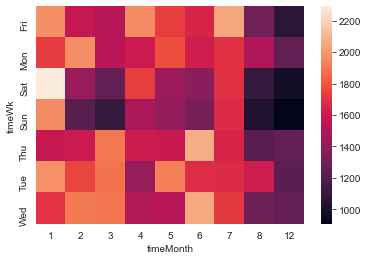

In [34]:
sns.heatmap(
            data=df.groupby(['timeWk', 'timeMonth']).count()['lat'].unstack())

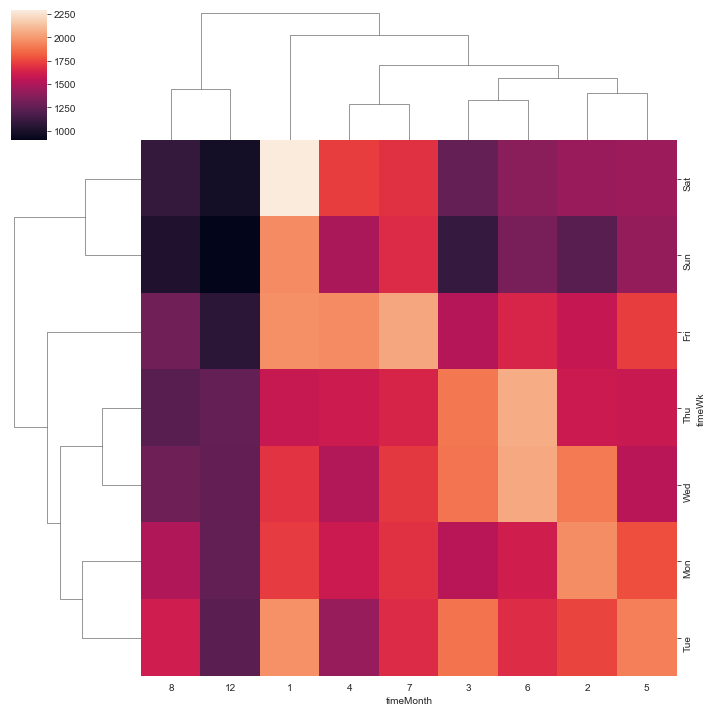

In [35]:
sns.clustermap(
            data=df.groupby(['timeWk', 'timeMonth']).count()['lat'].unstack())